# Sample Descriptives & Behavioral Responses to Moral Foundation Vignettes: Data Preparation and Visualizations

In [1]:
# --- Import Packages ---- #

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import glob
import numpy as np
import os 

# from utils import * 
sns.set_style("ticks")

%config Completer.use_jedi = False

In [2]:
import sys 
print (sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


# Load Survey Data

In [3]:
exp_dir = '/home/fhopp/spm/bids'

In [4]:
survey = pd.read_csv(os.path.join(exp_dir, 'participants.tsv'), sep='\t')

In [5]:
survey['Hand'].value_counts()

right    63
left      1
Name: Hand, dtype: int64

In [6]:
survey['NativeEnglish'].value_counts()

Yes    63
No      1
Name: NativeEnglish, dtype: int64

In [7]:
survey.head()

,Did you Vote?,What Presidential Candidate?,What House?,What Senate?,Did you donate since the experiment?,Did you volunteer?,Prop64,Prop60,Prop55,Prop62,...,media_YouTube,media_reddit,media_Snapchat,all_media_hours,campain_Any Ad,campain_Pro Clinton,campain_Pro Trump,campain_Anti Clinton,campain_Anti Trump,participant_id.6
0,yes,Clinton,Democrat,Harris,no,no,NaN,NaN,NaN,yes,...,4.0,NaN,NaN,12.0,0.0,0.0,0.0,0.0,0.0,sub-01
1,yes,Clinton,Democrat,Democrat,no,no,yes,no,yes,yes,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,sub-02
2,yes,Clinton,Democrat,Democrat,no,no,yes,NaN,yes,yes,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,sub-03
3,yes,Clinton,Democrat,Harris,no,no,yes,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub-04
4,yes,Trump,Republican,NaN,no,no,no,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub-05


***

# Basic Sample Descriptives & Demographics

## Age

In [8]:
survey['age'].describe()

count    64.000000
mean     20.781250
std       2.452525
min      18.000000
25%      19.000000
50%      20.000000
75%      21.250000
max      33.000000
Name: age, dtype: float64

## Gender

In [9]:
# Information taking from protocol!
gender_map = {1:'Male',2:'Female'}
survey['gender'] = survey['gender'].map(gender_map)
survey['gender'].value_counts()

Male      33
Female    31
Name: gender, dtype: int64

## Political Affiliation

In [10]:
# Add string for affiliation
pal_map = {1:'Democrat',2:'Republican',3:'Independent',4:'Unsure'}
survey['pol_af'] = survey['pol_af'].map(pal_map)

In [11]:
survey['pol_af'].value_counts()

Republican     23
Democrat       18
Independent    17
Unsure          6
Name: pol_af, dtype: int64

## Political Orientation

In [12]:
survey['pol_orient'].describe()

count    61.000000
mean     41.885246
std      28.905650
min       0.000000
25%      17.000000
50%      41.000000
75%      68.000000
max      95.000000
Name: pol_orient, dtype: float64

Our sample shows an overall moderate political orientation, with lower scores reflecting greater liberalism and higher scores indicating greater conservativism.

***

# Preparation of Behavioral Vignette Responses

Extract vignette ratings from BIDS files for analysis in R. 

In [13]:
vig_beh_files = glob.glob(os.path.join(exp_dir, 'sub-*/beh/sub-*_task-vignette_*_beh.tsv'))
vig_beh_dfs = []
for file in vig_beh_files:
    df = pd.read_csv(file, sep='\t')
    df['run'] = int(file.split('/')[-1].split('-')[-1].split('_')[0])
    vig_beh_dfs.append(df)
vig_beh = pd.concat(vig_beh_dfs)
vig_beh['item'] = vig_beh['stim_file'].apply(lambda x: x.split('/')[-1].split('.')[0])
 
vig_beh = vig_beh.reset_index()[['sub_id','item','trial_type','moral_decision','RT']].sort_values("sub_id")

In [14]:
vig_beh

,sub_id,item,trial_type,moral_decision,RT
3679,sub-01,careemo01,carem,4.0,7.148604
3645,sub-01,lib06,lib,NaN,NaN
3644,sub-01,socnorm12,socn,1.0,4.379596
3643,sub-01,careemo06,carem,3.0,5.065402
3642,sub-01,carephys14,carep,3.0,5.269476
...,...,...,...,...,...
5274,sub-64,socnorm05,socn,1.0,4.318445
5273,sub-64,fair07,fair,1.0,6.063246
5272,sub-64,careemo12,carem,1.0,7.920301
5284,sub-64,careemo13,carem,1.0,5.640362


In [15]:
# Store long-form
vig_beh.to_csv('vig_beh_long.csv', index=False)

In [16]:
# Compute wide-form
vig_wide = vig_beh.pivot(index=['sub_id'], columns=['item'], values=['moral_decision'])['moral_decision']
# Replace missings with column median
vig_wide.fillna(vig_wide.median(), inplace = True)
# Store wide-form
vig_wide.to_csv('vig_beh_wide.csv', index=None)

***

## Mean Condition Plots 

In [17]:
# Rename keys to be meaningful
cond_mapper = {'carep':'Physical Care',
              'carem':'Emotional Care',
              'fair':'Fairness',
              'lib':'Liberty',
              'loy':'Loyalty',
              'auth':'Authority',
              'pur':'Sanctity',
              'socn':'Social Norms'}

vig_order = ['carep','carem','fair','lib','loy','auth','pur','socn']

In [18]:
# Compute average response to each condition per participant
vig_avg = vig_beh.groupby(['sub_id','trial_type']).mean()['moral_decision'].reset_index().pivot(columns='trial_type',
                                                                                     index='sub_id')['moral_decision']

vig_avg.columns = [cond_mapper[c] for c in vig_avg.columns]
# Save averaged responses in wide form
vig_avg.to_csv('vig_avg_beh_wide.csv', index=None)

In [19]:
# Order vignette items 
items = vig_beh['item'].unique()
item_order = sorted(c for c in items if c.startswith('carep')) + \
sorted(c for c in items if c.startswith('careem')) + \
sorted(c for c in items if c.startswith('fair')) + \
sorted(c for c in items if c.startswith('lib')) + \
sorted(c for c in items if c.startswith('loy')) + \
sorted(c for c in items if c.startswith('auth')) + \
sorted(c for c in items if c.startswith('pur')) + \
sorted(c for c in items if c.startswith('socn'))

# Rename trial types to full names specified via cond_mapper
vig_beh['trial_type_long'] = vig_beh['trial_type'].map(cond_mapper)

### Fig. 1b.  Moral wrongness ratings per item and condition.

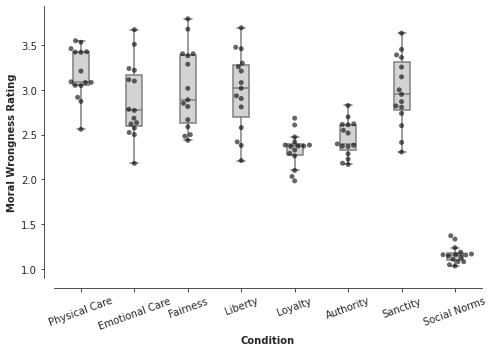

In [20]:
item_moral_dec = vig_beh.groupby(['item','trial_type_long']).mean()['moral_decision'].reset_index()

f, ax = plt.subplots(figsize=(7, 5))
sns.swarmplot(data=item_moral_dec, x='trial_type_long',y='moral_decision', ax=ax,
             color='black', order=cond_mapper.values(), alpha=0.6)

sns.boxplot(data=item_moral_dec, x='trial_type_long',y='moral_decision', color='lightgrey',  
              order=cond_mapper.values(),ax=ax, width=0.3, fliersize=0)
sns.despine(offset=10)

ax.set_xticklabels(labels=cond_mapper.values(), rotation=20)

plt.ylabel('Moral Wrongness Rating', weight='bold')
plt.xlabel('Condition', weight='bold')
plt.tight_layout()
plt.savefig('vig_item_cond_rating.png',dpi=300)
plt.show()

### Fig. 1b. Moral wrongness ratings per condition.

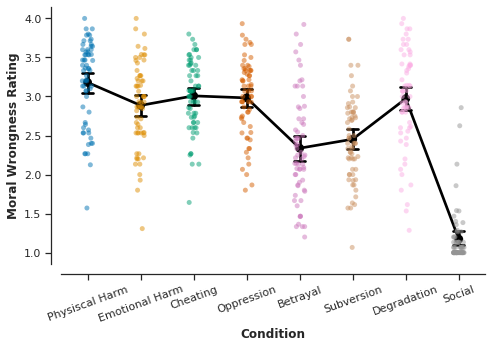

In [21]:
# Same as above, but averaged per participant (not item)
sns.set_theme(style="ticks", palette="colorblind", font_scale=1)

sub_moral_dec = vig_beh.groupby(['sub_id','trial_type']).mean()['moral_decision'].unstack().melt()
f, ax = plt.subplots(figsize=(7, 5))
sns.stripplot(data=sub_moral_dec, x='trial_type',y='value', palette='colorblind', order=vig_order, ax=ax, 
             alpha=0.5)

sns.pointplot(data=sub_moral_dec, x='trial_type',y='value', color='black',  
              order=vig_order,ax=ax, capsize=.2)
sns.despine(offset=10)

ax.set_xticklabels(labels=['Physiscal Harm', 'Emotional Harm',
                      'Cheating','Oppression','Betrayal','Subversion',
                      'Degradation','Social'], rotation=20)
plt.ylabel('Moral Wrongness Rating', weight='bold')
plt.xlabel('Condition', weight='bold')
plt.tight_layout()
plt.savefig('vig_cond_rating.png',dpi=300)
plt.show()

### Fig. 1c. Response times per condition.

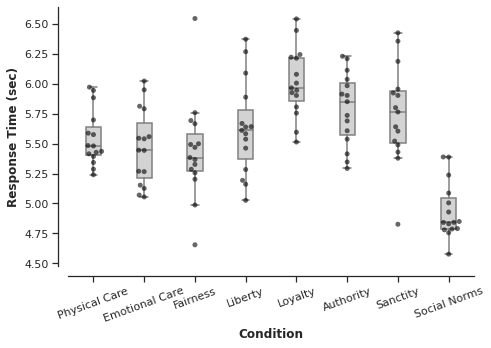

In [22]:
item_moral_rt = vig_beh.groupby(['item','trial_type_long']).mean()['RT'].reset_index()

f, ax = plt.subplots(figsize=(7, 5))
sns.swarmplot(data=item_moral_rt, x='trial_type_long',y='RT', ax=ax,
             color='black', order=cond_mapper.values(),  alpha=0.6)

sns.boxplot(data=item_moral_rt, x='trial_type_long',y='RT', color='lightgrey',  
              order=cond_mapper.values(),ax=ax, width=0.3, fliersize=0)
sns.despine(offset=10)

ax.set_xticklabels(labels=cond_mapper.values(), rotation=20)

plt.ylabel('Response Time (sec)', weight='bold')
plt.xlabel('Condition', weight='bold')
plt.tight_layout()
plt.savefig('vig_item_cond_rt.png',dpi=300)
plt.show()

***